In [1]:
import pandas as pd
import pyreadr
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Import du fichier 15 semaines 

In [2]:
df_15weeks = pd.read_csv('https://github.com/TristanBOOK/coronanet/blob/master/coronanet/data/LMA_data_15_semaines.csv?raw=true')

In [3]:
df_15weeks.drop(columns='index', inplace=True)

##  Creation de PolicyFamily

In [4]:
df_15weeks.insert(2,'PolicyFamily','')
df_15weeks['PolicyFamily']  = df_15weeks['PolicyType'].astype(str).str[0]
df_15weeks

,ID,Date,PolicyFamily,PolicyType,value,Cases,Cases_New,Type,Source,J-56,...,J-7,J0,J7,J14,J21,J28,J35,J42,J49,J56
0,AD,2020-02-27,E,E3_diff,141399008,0.0,0.0,Deaths,JHU,NaN,...,0.0,0.0,0.0,0.0,0.0,3.0,15.0,25.0,33.0,37.0
1,AD,2020-02-28,E,E3_diff,-141399008,0.0,0.0,Deaths,JHU,NaN,...,0.0,0.0,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0
2,AD,2020-03-02,H,H2_diff,1,0.0,0.0,Deaths,JHU,NaN,...,0.0,0.0,0.0,0.0,1.0,8.0,21.0,29.0,37.0,40.0
3,AD,2020-03-11,H,H6_diff,2,0.0,0.0,Deaths,JHU,NaN,...,0.0,0.0,0.0,1.0,14.0,23.0,33.0,37.0,42.0,46.0
4,AD,2020-03-13,C,C3_diff,1,0.0,0.0,Deaths,JHU,NaN,...,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,43.0,47.0
5,AD,2020-03-13,C,C6_diff,1,0.0,0.0,Deaths,JHU,NaN,...,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,43.0,47.0
6,AD,2020-03-13,E,E1_diff,2,0.0,0.0,Deaths,JHU,NaN,...,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,43.0,47.0
7,AD,2020-03-14,C,C2_diff,3,0.0,0.0,Deaths,JHU,NaN,...,0.0,0.0,0.0,3.0,17.0,26.0,35.0,40.0,44.0,48.0
8,AD,2020-03-16,C,C1_diff,3,0.0,0.0,Deaths,JHU,NaN,...,0.0,0.0,1.0,8.0,21.0,29.0,37.0,40.0,45.0,48.0
9,AD,2020-03-25,C,C5_diff,1,1.0,0.0,Deaths,JHU,0.0,...,0.0,1.0,14.0,23.0,33.0,37.0,42.0,46.0,49.0,51.0


## Creation de diff (new cases)

In [5]:
temp = df_15weeks.columns.to_list()[:9]
temp

['ID',
 'Date',
 'PolicyFamily',
 'PolicyType',
 'value',
 'Cases',
 'Cases_New',
 'Type',
 'Source']

In [6]:
df_15weeks_diff = df_15weeks.drop(columns=temp)

In [7]:
df_15weeks_diff = df_15weeks_diff.diff(periods=1,axis=1)

In [8]:
dico = {}
for i in df_15weeks_diff.columns.to_list():
    dico[i] = f'{i}_diff'

In [9]:
df_15weeks_diff = df_15weeks_diff.rename(dico,axis=1)

## Merge avec 15weeks 

In [10]:
df_15weeks_merge = pd.concat([df_15weeks, df_15weeks_diff],axis='columns')

In [11]:
df_15weeks_merge

,ID,Date,PolicyFamily,PolicyType,value,Cases,Cases_New,Type,Source,J-56,...,J-7_diff,J0_diff,J7_diff,J14_diff,J21_diff,J28_diff,J35_diff,J42_diff,J49_diff,J56_diff
0,AD,2020-02-27,E,E3_diff,141399008,0.0,0.0,Deaths,JHU,NaN,...,0.0,0.0,0.0,0.0,0.0,3.0,12.0,10.0,8.0,4.0
1,AD,2020-02-28,E,E3_diff,-141399008,0.0,0.0,Deaths,JHU,NaN,...,0.0,0.0,0.0,0.0,0.0,3.0,13.0,10.0,9.0,5.0
2,AD,2020-03-02,H,H2_diff,1,0.0,0.0,Deaths,JHU,NaN,...,0.0,0.0,0.0,0.0,1.0,7.0,13.0,8.0,8.0,3.0
3,AD,2020-03-11,H,H6_diff,2,0.0,0.0,Deaths,JHU,NaN,...,0.0,0.0,0.0,1.0,13.0,9.0,10.0,4.0,5.0,4.0
4,AD,2020-03-13,C,C3_diff,1,0.0,0.0,Deaths,JHU,NaN,...,0.0,0.0,0.0,3.0,13.0,10.0,9.0,5.0,3.0,4.0
5,AD,2020-03-13,C,C6_diff,1,0.0,0.0,Deaths,JHU,NaN,...,0.0,0.0,0.0,3.0,13.0,10.0,9.0,5.0,3.0,4.0
6,AD,2020-03-13,E,E1_diff,2,0.0,0.0,Deaths,JHU,NaN,...,0.0,0.0,0.0,3.0,13.0,10.0,9.0,5.0,3.0,4.0
7,AD,2020-03-14,C,C2_diff,3,0.0,0.0,Deaths,JHU,NaN,...,0.0,0.0,0.0,3.0,14.0,9.0,9.0,5.0,4.0,4.0
8,AD,2020-03-16,C,C1_diff,3,0.0,0.0,Deaths,JHU,NaN,...,0.0,0.0,1.0,7.0,13.0,8.0,8.0,3.0,5.0,3.0
9,AD,2020-03-25,C,C5_diff,1,1.0,0.0,Deaths,JHU,0.0,...,0.0,1.0,13.0,9.0,10.0,4.0,5.0,4.0,3.0,2.0


## Creation d'Evol (Cases / cases J-7) ** 1/6

In [19]:
df_15weeks.drop(columns='d7',inplace=True)dd

In [20]:
df_15weeks.tail(3)

,ID,Date,PolicyFamily,PolicyType,value,Cases,Cases_New,Type,Source,J-56,...,J56,i_J7,i_J14,i_J21,i_J28,i_J35,i_J42,i_J49,i_J56,d_j-7
14579,ZW,2020-10-27,E,E4_diff,-3800000,242.0,0.0,Deaths,JHU,203.0,...,NaN,1.002736,1.004033,1.003594,1.00461,1.003981,NaN,NaN,NaN,1.006337
14580,ZW,2020-11-09,C,C1_diff,-1,254.0,1.0,Deaths,JHU,224.0,...,NaN,1.001959,1.005564,1.004162,NaN,NaN,NaN,NaN,NaN,1.006031
14581,ZW,2020-11-20,C,C1_diff,1,265.0,0.0,Deaths,JHU,227.0,...,NaN,1.006193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.005122


In [17]:
df_15weeks['d_j-7'] = (df_15weeks['Cases'] / df_15weeks['J-7'])**(1/6)

In [12]:
temp = df_15weeks.columns.to_list()[9:]
temp_neg = temp[:7]
temp_pos = temp[8:16]

In [13]:
temp_neg.reverse()
temp_neg

['J-7', 'J-14', 'J-21', 'J-28', 'J-35', 'J-42', 'J-56']

In [42]:
for i in temp_neg:
    df_15weeks[f'{i}_evol'] = (df_15weeks_merge['Cases'] / df_15weeks[f'{i}'])**(1/((1+temp_neg.index(i))*7-1))

In [67]:
(1+temp_neg.index('J-7'))*7-1

6

## Creation d'Evol (Cases J+7/Cases) ** 1/6

In [14]:
temp_pos

['J7', 'J14', 'J21', 'J28', 'J35', 'J42', 'J49', 'J56']

In [15]:
for i in temp_pos:
    df_15weeks[f'i_{i}'] = (df_15weeks[f'{i}'] / df_15weeks['Cases'])**(1/((1+temp_pos.index(i))*7-1))

In [44]:
df_15weeks.columns.to_list()

['ID',
 'Date',
 'PolicyFamily',
 'PolicyType',
 'value',
 'Cases',
 'Cases_New',
 'Type',
 'Source',
 'J-56',
 'J-42',
 'J-35',
 'J-28',
 'J-21',
 'J-14',
 'J-7',
 'J0',
 'J7',
 'J14',
 'J21',
 'J28',
 'J35',
 'J42',
 'J49',
 'J56',
 'J-56_evol',
 'J-42_evol',
 'J-35_evol',
 'J-28_evol',
 'J-21_evol',
 'J-14_evol',
 'J-7_evol',
 'J0_evol',
 'J7_evol',
 'J14_evol',
 'J21_evol',
 'J28_evol',
 'J35_evol',
 'J42_evol',
 'J49_evol',
 'J56_evol']

## Visualisation de la table 

In [21]:
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
display(df_15weeks)


,ID,Date,PolicyFamily,PolicyType,value,Cases,Cases_New,Type,Source,J-56,J-42,J-35,J-28,J-21,J-14,J-7,J0,J7,J14,J21,J28,J35,J42,J49,J56,i_J7,i_J14,i_J21,i_J28,i_J35,i_J42,i_J49,i_J56,d_j-7
0,AD,2020-02-27,E,E3_diff,141399008,0.0,0.0,Deaths,JHU,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,15.0,25.0,33.0,37.0,NaN,NaN,NaN,inf,inf,inf,inf,inf,NaN
1,AD,2020-02-28,E,E3_diff,-141399008,0.0,0.0,Deaths,JHU,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,NaN,NaN,NaN,inf,inf,inf,inf,inf,NaN
2,AD,2020-03-02,H,H2_diff,1,0.0,0.0,Deaths,JHU,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,21.0,29.0,37.0,40.0,NaN,NaN,inf,inf,inf,inf,inf,inf,NaN
3,AD,2020-03-11,H,H6_diff,2,0.0,0.0,Deaths,JHU,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,23.0,33.0,37.0,42.0,46.0,NaN,inf,inf,inf,inf,inf,inf,inf,NaN
4,AD,2020-03-13,C,C3_diff,1,0.0,0.0,Deaths,JHU,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,43.0,47.0,NaN,inf,inf,inf,inf,inf,inf,inf,NaN
5,AD,2020-03-13,C,C6_diff,1,0.0,0.0,Deaths,JHU,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,43.0,47.0,NaN,inf,inf,inf,inf,inf,inf,inf,NaN
6,AD,2020-03-13,E,E1_diff,2,0.0,0.0,Deaths,JHU,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,43.0,47.0,NaN,inf,inf,inf,inf,inf,inf,inf,NaN
7,AD,2020-03-14,C,C2_diff,3,0.0,0.0,Deaths,JHU,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.0,26.0,35.0,40.0,44.0,48.0,NaN,inf,inf,inf,inf,inf,inf,inf,NaN
8,AD,2020-03-16,C,C1_diff,3,0.0,0.0,Deaths,JHU,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,21.0,29.0,37.0,40.0,45.0,48.0,inf,inf,inf,inf,inf,inf,inf,inf,NaN
9,AD,2020-03-25,C,C5_diff,1,1.0,0.0,Deaths,JHU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,23.0,33.0,37.0,42.0,46.0,49.0,51.0,1.552463,1.272765,1.191038,1.143093,1.116202,1.097880,1.084457,1.074105,inf


## Creations des deltas 

In [24]:
mes_i = df_15weeks.columns.to_list()[-9:-1]

In [26]:
for i in mes_i:
    df_15weeks[f'delta_{((mes_i.index(i))+1)*7}'] = df_15weeks[i]/df_15weeks['d_j-7']

In [27]:
df_15weeks

,ID,Date,PolicyFamily,PolicyType,value,Cases,Cases_New,Type,Source,J-56,J-42,J-35,J-28,J-21,J-14,J-7,J0,J7,J14,J21,J28,J35,J42,J49,J56,i_J7,i_J14,i_J21,i_J28,i_J35,i_J42,i_J49,i_J56,d_j-7,delta_7,delta_14,delta_21,delta_28,delta_35,delta_42,delta_49,delta_56
0,AD,2020-02-27,E,E3_diff,141399008,0.0,0.0,Deaths,JHU,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,15.0,25.0,33.0,37.0,NaN,NaN,NaN,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,2020-02-28,E,E3_diff,-141399008,0.0,0.0,Deaths,JHU,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,NaN,NaN,NaN,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,2020-03-02,H,H2_diff,1,0.0,0.0,Deaths,JHU,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,21.0,29.0,37.0,40.0,NaN,NaN,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,2020-03-11,H,H6_diff,2,0.0,0.0,Deaths,JHU,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,23.0,33.0,37.0,42.0,46.0,NaN,inf,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,2020-03-13,C,C3_diff,1,0.0,0.0,Deaths,JHU,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,43.0,47.0,NaN,inf,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AD,2020-03-13,C,C6_diff,1,0.0,0.0,Deaths,JHU,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,43.0,47.0,NaN,inf,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AD,2020-03-13,E,E1_diff,2,0.0,0.0,Deaths,JHU,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,43.0,47.0,NaN,inf,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AD,2020-03-14,C,C2_diff,3,0.0,0.0,Deaths,JHU,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.0,26.0,35.0,40.0,44.0,48.0,NaN,inf,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AD,2020-03-16,C,C1_diff,3,0.0,0.0,Deaths,JHU,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,21.0,29.0,37.0,40.0,45.0,48.0,inf,inf,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AD,2020-03-25,C,C5_diff,1,1.0,0.0,Deaths,JHU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,23.0,33.0,37.0,42.0,46.0,49.0,51.0,1.552463,1.272765,1.191038,1.143093,1.116202,1.097880,1.084457,1.074105,inf,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
df_15weeks.head(2)

,ID,Date,PolicyFamily,PolicyType,value,Cases,Cases_New,Type,Source,J-56,J-42,J-35,J-28,J-21,J-14,J-7,J0,J7,J14,J21,J28,J35,J42,J49,J56,i_J7,i_J14,i_J21,i_J28,i_J35,i_J42,i_J49,i_J56,d_j-7,delta_7,delta_14,delta_21,delta_28,delta_35,delta_42,delta_49,delta_56
0,AD,2020-02-27,E,E3_diff,141399008,0.0,0.0,Deaths,JHU,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,15.0,25.0,33.0,37.0,NaN,NaN,NaN,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,2020-02-28,E,E3_diff,-141399008,0.0,0.0,Deaths,JHU,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,NaN,NaN,NaN,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## OLD Creation de delta

In [93]:
temp2_pos = df_15weeks.columns.to_list()[-8:-2]
temp2_neg = df_15weeks.columns.to_list()[26:-9]
temp2_neg.reverse()
print(temp2_neg)
print(temp2_pos)

['J-7_evol', 'J-14_evol', 'J-21_evol', 'J-28_evol', 'J-35_evol', 'J-42_evol']
['J7_evol', 'J14_evol', 'J21_evol', 'J28_evol', 'J35_evol', 'J42_evol']


In [99]:
((temp2_pos.index('J7_evol'))+1)*7

7

In [101]:
temp2_pos[1]

'J14_evol'

In [102]:
for i in range(len(temp2_pos)):
     df_15weeks[f'{(i+1)*7}_day_ratio'] = df_15weeks[f'{temp2_pos[i]}']/df_15weeks[f'{temp2_neg[i]}']

In [395]:
df_15weeks['delta14']=df_15weeks['J14_evol']/df_15weeks['J7_evol']

## Scatter Monde

In [43]:
import seaborn as sns

### Scatter monde d7 et delta 14

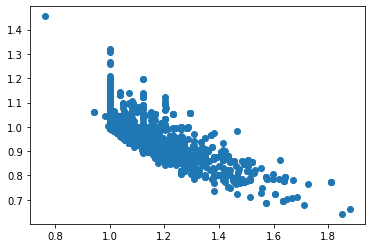

In [68]:
plt.scatter(df_15weeks['d_j-7'],df_15weeks['delta_14'])
# plt.yscale('log')

### Scatter monde d7 et delta14 (hue = PoliceFamily)

In [53]:
df_15weeks_pol_fam_c = df_15weeks[df_15weeks['PolicyFamily']=='C']
df_15weeks_pol_fam_e = df_15weeks[df_15weeks['PolicyFamily']=='E']
df_15weeks_pol_fam_H = df_15weeks[df_15weeks['PolicyFamily']=='H']

<AxesSubplot:xlabel='d_j-7', ylabel='delta_14'>

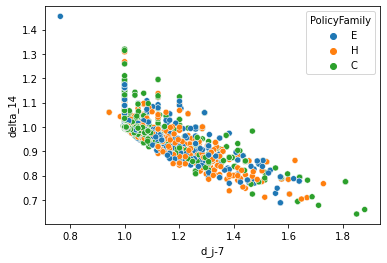

In [69]:
sns.scatterplot(x=df_15weeks['d_j-7'],y=df_15weeks['delta_14'],hue=df_15weeks['PolicyFamily'])


### Scatter monde d7 et i14 (hue = PoliceFamily)

<AxesSubplot:xlabel='d_j-7', ylabel='i_J14'>

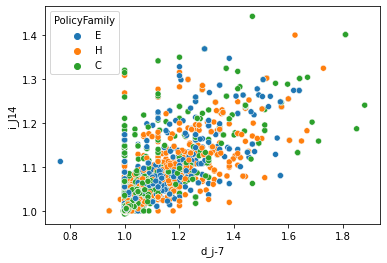

In [67]:
# sns.scatterplot(x=df_15weeks['d_j-7'],y=df_15weeks['delta_21'],hue=df_15weeks['PolicyFamily'])
sns.scatterplot(x=df_15weeks['d_j-7'],y=df_15weeks['i_J14'],hue=df_15weeks['PolicyFamily'])


### Scatter monde d7 et delta14 by PoliceFamily

<AxesSubplot:xlabel='d_j-7', ylabel='delta_21'>

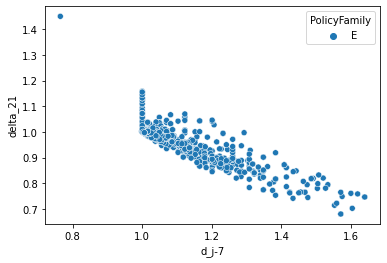

In [56]:
sns.scatterplot(x=df_15weeks_pol_fam_e['d_j-7'],y=df_15weeks_pol_fam_e['delta_21'],hue=df_15weeks_pol_fam_e['PolicyFamily'])


<AxesSubplot:xlabel='d_j-7', ylabel='delta_21'>

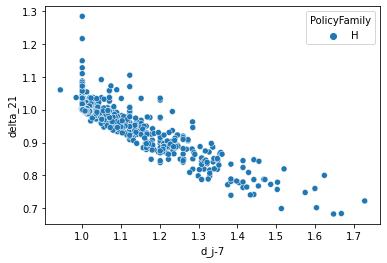

In [58]:
sns.scatterplot(x=df_15weeks_pol_fam_H['d_j-7'],y=df_15weeks_pol_fam_H['delta_21'],hue=df_15weeks_pol_fam_H['PolicyFamily'])


<AxesSubplot:xlabel='d_j-7', ylabel='delta_21'>

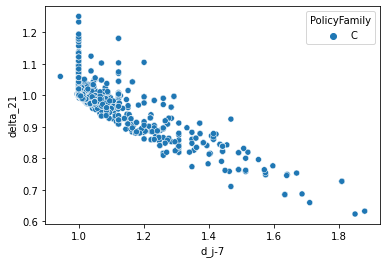

In [59]:
sns.scatterplot(x=df_15weeks_pol_fam_c['d_j-7'],y=df_15weeks_pol_fam_c['delta_21'],hue=df_15weeks_pol_fam_c['PolicyFamily'])

## Scatter France

In [28]:
df_15weeks_france = df_15weeks[df_15weeks['ID']=='FR']

(0.8, 1.2)

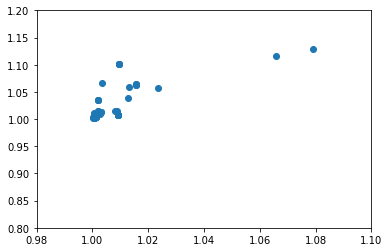

In [405]:
plt.scatter(df_15weeks_france['J-7_evol'],df_15weeks_france['delta14'])
# plt.yscale('log')
plt.xlim(0.98,1.1)
plt.ylim(0.8,1.2)

In [32]:
df_15weeks_france_pos = df_15weeks[(df_15weeks['ID']=='FR')&(df_15weeks['value']>0)]

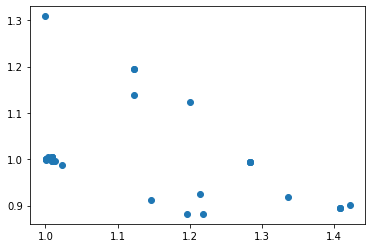

In [33]:
plt.scatter(df_15weeks_france_pos['d_j-7'],df_15weeks_france_pos['delta_14'])


## Tentative de modelisation

### Baseline Model avec X = d_j-7 et y = i_J14

In [319]:
df = df_15weeks.copy()

In [320]:
cols = ['d_j-7','i_J14']
cols
df = df[cols]

In [321]:
df.head()

,d_j-7,i_J14
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,inf
4,NaN,inf


In [322]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace = True)

In [323]:
X = df[cols].drop(columns='i_J14')
y = df['i_J14']

In [324]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [325]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.689208056515112

### Regression lineaire avec encoding des PolicyTypes and Values

In [338]:
df = df_15weeks.copy()

In [339]:
df.head(2)

,ID,Date,PolicyFamily,PolicyType,value,Cases,Cases_New,Type,Source,J-56,J-42,J-35,J-28,J-21,J-14,J-7,J0,J7,J14,J21,J28,J35,J42,J49,J56,i_J7,i_J14,i_J21,i_J28,i_J35,i_J42,i_J49,i_J56,d_j-7,delta_7,delta_14,delta_21,delta_28,delta_35,delta_42,delta_49,delta_56
0,AD,2020-02-27,E,E3_diff,141399008,0.0,0.0,Deaths,JHU,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,15.0,25.0,33.0,37.0,NaN,NaN,NaN,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,2020-02-28,E,E3_diff,-141399008,0.0,0.0,Deaths,JHU,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,NaN,NaN,NaN,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [340]:
pol_type = ['E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff', 'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff', 'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff', 'H5_diff']

In [341]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
for i in pol_type:
    df[i] = -100000
    df[i] = df[df['PolicyType']==i]['value']
    df[i] = df[i].fillna(0)
#     scaler = MinMaxScaler()
#     scaler.fit_transform(df[[i]])
#     df[i] = scaler.transform(df[[i]])
    

In [342]:
df

,ID,Date,PolicyFamily,PolicyType,value,Cases,Cases_New,Type,Source,J-56,J-42,J-35,J-28,J-21,J-14,J-7,J0,J7,J14,J21,J28,J35,J42,J49,J56,i_J7,i_J14,i_J21,i_J28,i_J35,i_J42,i_J49,i_J56,d_j-7,delta_7,delta_14,delta_21,delta_28,delta_35,delta_42,delta_49,delta_56,E3_diff,H2_diff,H6_diff,C3_diff,C6_diff,E1_diff,C2_diff,C1_diff,C5_diff,H1_diff,H3_diff,H4_diff,C8_diff,E2_diff,C4_diff,E4_diff,C7_diff,H5_diff
0,AD,2020-02-27,E,E3_diff,141399008,0.0,0.0,Deaths,JHU,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,15.0,25.0,33.0,37.0,NaN,NaN,NaN,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141399008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AD,2020-02-28,E,E3_diff,-141399008,0.0,0.0,Deaths,JHU,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,NaN,NaN,NaN,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-141399008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AD,2020-03-02,H,H2_diff,1,0.0,0.0,Deaths,JHU,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,21.0,29.0,37.0,40.0,NaN,NaN,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AD,2020-03-11,H,H6_diff,2,0.0,0.0,Deaths,JHU,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,23.0,33.0,37.0,42.0,46.0,NaN,inf,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AD,2020-03-13,C,C3_diff,1,0.0,0.0,Deaths,JHU,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,43.0,47.0,NaN,inf,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,AD,2020-03-13,C,C6_diff,1,0.0,0.0,Deaths,JHU,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,43.0,47.0,NaN,inf,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,AD,2020-03-13,E,E1_diff,2,0.0,0.0,Deaths,JHU,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,43.0,47.0,NaN,inf,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,AD,2020-03-14,C,C2_diff,3,0.0,0.0,Deaths,JHU,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.0,26.0,35.0,40.0,44.0,48.0,NaN,inf,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,AD,2020-03-16,C,C1_diff,3,0.0,0.0,Deaths,JHU,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,21.0,29.0,37.0,40.0,45.0,48.0,inf,inf,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,AD,2020-03-25,C,C5_diff,1,1.0,0.0,Deaths,JHU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,23.0,33.0,37.0,42.0,46.0,49.0,51.0,1.552463,1.272765,1.191038,1.143093,1.116202,1.097880,1.084457,1.074105,inf,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [331]:
col_ = df.columns.to_list()[-18:]
cols = ['E3_diff','H2_diff','H6_diff','C3_diff','C6_diff','E1_diff','C2_diff','C1_diff','C5_diff','H1_diff','H3_diff','H4_diff','C8_diff','E2_diff','C4_diff','E4_diff','C7_diff','H5_diff','d_j-7','i_J14']
cols
df = df[cols]

In [332]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace = True)

/Users/Laurent/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/Laurent/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [333]:
X = df[cols].drop(columns='i_J14')
y = df['i_J14']

In [334]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [335]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6929526908092007

### Regression lineaire sans dataLeak

In [159]:
df = df_15weeks.copy()

In [160]:
df.head(2)

,ID,Date,PolicyFamily,PolicyType,value,Cases,Cases_New,Type,Source,J-56,J-42,J-35,J-28,J-21,J-14,J-7,J0,J7,J14,J21,J28,J35,J42,J49,J56,i_J7,i_J14,i_J21,i_J28,i_J35,i_J42,i_J49,i_J56,d_j-7,delta_7,delta_14,delta_21,delta_28,delta_35,delta_42,delta_49,delta_56
0,AD,2020-02-27,E,E3_diff,141399008,0.0,0.0,Deaths,JHU,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,15.0,25.0,33.0,37.0,NaN,NaN,NaN,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,2020-02-28,E,E3_diff,-141399008,0.0,0.0,Deaths,JHU,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,NaN,NaN,NaN,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
df['PolicyType'] = df['PolicyType'].astype('category').cat.codes

In [162]:
df['PolicyType'].nunique()

18

In [163]:
cols = ['PolicyType','value', 'd_j-7','i_J14']
cols
df = df[cols]

In [164]:
df.head()

,PolicyType,value,d_j-7,i_J14
0,10,141399008,NaN,NaN
1,10,-141399008,NaN,NaN
2,13,1,NaN,NaN
3,17,2,NaN,inf
4,2,1,NaN,inf


In [165]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace = True)

In [166]:
X = df[cols].drop(columns='i_J14')
y = df['i_J14']

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [168]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6894521693015092

### Regression lineaire avec PolicyFamily

In [186]:
df = df_15weeks.copy()

In [187]:
df.head(2)

,ID,Date,PolicyFamily,PolicyType,value,Cases,Cases_New,Type,Source,J-56,J-42,J-35,J-28,J-21,J-14,J-7,J0,J7,J14,J21,J28,J35,J42,J49,J56,i_J7,i_J14,i_J21,i_J28,i_J35,i_J42,i_J49,i_J56,d_j-7,delta_7,delta_14,delta_21,delta_28,delta_35,delta_42,delta_49,delta_56
0,AD,2020-02-27,E,E3_diff,141399008,0.0,0.0,Deaths,JHU,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,15.0,25.0,33.0,37.0,NaN,NaN,NaN,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,2020-02-28,E,E3_diff,-141399008,0.0,0.0,Deaths,JHU,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,26.0,35.0,40.0,NaN,NaN,NaN,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
df= pd.get_dummies(df,columns = ['PolicyType'])


In [191]:
pol = df.columns.to_list()[-18:]

In [195]:
cols = ['PolicyType_C1_diff','PolicyType_C2_diff','PolicyType_C3_diff','PolicyType_C4_diff','PolicyType_C5_diff','PolicyType_C6_diff','PolicyType_C7_diff','PolicyType_C8_diff','PolicyType_E1_diff','PolicyType_E2_diff','PolicyType_E3_diff','PolicyType_E4_diff','PolicyType_H1_diff','PolicyType_H2_diff','PolicyType_H3_diff','PolicyType_H4_diff','PolicyType_H5_diff','PolicyType_H6_diff','value','d_j-7','i_J14']
cols
df = df[cols]

In [196]:
df.head()

,PolicyType_C1_diff,PolicyType_C2_diff,PolicyType_C3_diff,PolicyType_C4_diff,PolicyType_C5_diff,PolicyType_C6_diff,PolicyType_C7_diff,PolicyType_C8_diff,PolicyType_E1_diff,PolicyType_E2_diff,PolicyType_E3_diff,PolicyType_E4_diff,PolicyType_H1_diff,PolicyType_H2_diff,PolicyType_H3_diff,PolicyType_H4_diff,PolicyType_H5_diff,PolicyType_H6_diff,value,d_j-7,i_J14
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,141399008,NaN,NaN
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-141399008,NaN,NaN
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,NaN
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,NaN,inf
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,inf


In [197]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace = True)

/Users/Laurent/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/Laurent/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [198]:
X = df[cols].drop(columns='i_J14')
y = df['i_J14']

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [200]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6872366271483622

## import de Global Deaths 

In [332]:
deaths = pd.read_csv('../data_LMA/DataCoronaNet/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [333]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,3,3,4,4,4,4,4,4,8,10,12,15,16,16,17,18,18,19,22,23,29,30,30,30,33,36,36,40,40,43,47,52,58,59,61,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,170,173,178,188,194,206,217,219,220,221,228,236,247,250,258,266,274,298,304,313,331,361,373,388,409,430,450,455,475,482,495,508,550,552,573,585,597,617,638,674,682,716,728,740,752,780,809,821,828,866,900,922,939,959,973,996,1012,1040,1064,1096,1117,1149,1166,1183,1185,1188,1192,1213,1227,1249,1261,1271,1272,1273,1283,1284,1285,1286,1290,1290,1296,1301,1310,1315,1321,1329,1346,1356,1365,1370,1371,1376,1378,1382,1384,1386,1386,1386,1388,1390,1398,1402,1402,1403,1403,1403,1403,1407,1410,1410,1410,1410,1413,1416,1419,1421,1421,1421,1421,1421,1427,1428,1438,1438,1439,1439,1443,1446,1447,1448,1453,1453,1455,1455,1458,1460,1460,1460,1460,1464,1464,1468,1469,1471,1472,1474,1475,1479,1481,1482,1483,1483,1487,1490,1494,1499,1501,1503,1507,1509,1513,1516,1520,1525,1531,1534,1535,1538,1538,1544,1547,1551,1557,1557,1559,1565,1577,1580,1584,1594,1598,1608,1620,1635,1641,1648,1653,1666,1678,1690,1702,1715,1728,1737,1740,1752,1774,1795,1822,1841,1846,1846
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,

In [334]:
from coronanet.feateng import t0_creation

In [335]:
df_death=t0_creation(deaths)
df_death.drop(index=318, inplace=True)
df_death.date = pd.to_datetime(df_death.date)

In [336]:
df_death = df_death.resample('W', on='date').sum()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia New South Wales,Australia Tasmania,Australia Victoria,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Belarus,Belgium,Belize,Benin,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burma,Cabo Verde,Cameroon,Canada Alberta,Canada British Columbia,Canada Manitoba,Canada Nova Scotia,Canada Ontario,Canada Quebec,Canada Saskatchewan,Central African Republic,Chad,Chile,China Heilongjiang,China Henan,China Hong Kong,China Hubei,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Diamond Princess,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Estonia,Eswatini,Ethiopia,Finland,France French Guiana,France French Polynesia,France Guadeloupe,France Martinique,France Mayotte,France Reunion,France St Martin,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kosovo,Kuwait,Kyrgyzstan,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Morocco,Mozambique,Namibia,Nepal,Netherlands Aruba,Netherlands Sint Maarten,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom Channel Islands,United Kingdom Isle of Man,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
317,2020-12-04 00:00:00,1846,870,2492,77,353,39512,2277,53,13,820,3651,1551,163,341,6772,1190,17142,170,44,8987,2865,34,175964,4650,68,2059,108,443,590,492,362,65,3759,7183,55,63,102,15558,13,22,112,4512,37467,94,337,1773,132,2032,136,57,8738,867,13,61,2343,13696,6732,1142,85,125,122,1734,408,71,79,149,41,49,41,12,54416,60,123,1425,18577,325,2804,4224,76,44,151,233,2938,5513,27,139700,17479,49695,12387,2086,2896,58852,260,2210,2960,2484,1506,540,1026,886,1285,242,1078,44,83,1219,17,590,345,255,185,376,47,163,149,182,10,108863,2384,522,6136,133,152,1567,45,26,9623,25,161,77,1179,1877,354,1435,8303,3154,1813,36076,8509,19359,4803,239,12052,41730,51,47,17,5940,336,1834,74,29,957,1653,121,21963,62,46252,130,1271,117,7067,5293,437,87,21,60,65,121,3481,14509,278932,206,13641,586,48,25,60617,80,611,913,35,797,627,364,281
318,,2020-01-29 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-01-29 00:00:00,2020-02-01 00:00:00,2020-01-29 00:00:00,2020-01-29 00:00:00,2020-01-29 00:00:00,2020-01-29 00:00:00,2020-02-04 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-29 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-01-29 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-29 00:00:00,2020-01-29 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-01-29 00:00:00,2020-01-29 00:00:00,2020-02-01 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-29 00:00:00,2020-02-01 00:00:00,2020-02-06 00:00:00,2020-01-29 00:00:00,2020-02-02 00:00:00,2020-01-29 00:00:00,2020-01-31 00:00:00,2020-01-30 00:00:00,2020-01-29 00:00:00,2020-01-29 00:00:00,2020-02-05 00:00:00,2020-01-29 00:00:00,2020-01-29 00:00:00,2020-02-01 00:00:00,2020-01-29 00:00:00,2020-02-01 00:00:00,2020-01-31 00:00:00,2020-01-30 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-02-01 00:00:00,2020-01-29 00:00:00,2020-01-29 00:00:00,2020-01-29 00:00:00,2020-02-02 00:00:00,2020-01-29 00:00:00,2020-01-29 00:00:00,2020-01-29 00:00:00,2020-01-30 00:0

## Test sur la France

In [341]:
df_france = df_death['France']

In [342]:
df_france = pd.DataFrame(df_france)

In [343]:
df_france['shift'] = df_france.diff().fillna(0)

In [344]:
df_france.shape


(46, 2)

In [345]:
df_france = df_france.iloc[:45,:]

In [353]:
jours = [1,2,3,4,5,6,7,8]
for i in jours:
    df_france[f'delta_{i*7}'] = (df_france['shift'].shift(periods=i, freq=None, axis=0, fill_value=None)/df_france['shift'])**(1/(i*7-1))
    



In [367]:
df_france['delta7BIS'] = df_france['shift'].shift(periods=1, freq=None, axis=0, fill_value=None)
df_france['d_t-7**'] = (df_france['shift']/df_france['delta7BIS'])**(1/6)

In [383]:
df_france['Arturo'] = df_france['delta_7']/df_france['d_t-7**']
df_france['Arturo_56'] = df_france['delta_56']/df_france['d_t-7**']

In [386]:
df_france.head(15)

,France,shift,delta_7,delta_14,delta_21,delta_28,delta_35,delta_42,delta_49,delta_56,delta7BIS,d_t-7**,Arturo,Arturo_%^,Arturo_56
date,,,,,,,,,,,,,,,
2020-01-26,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-02,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-02-09,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-02-16,2,2.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,inf,0.000000,NaN,NaN
2020-02-23,7,5.0,0.858374,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,2.0,1.164993,0.736806,NaN,NaN
2020-03-01,12,5.0,1.000000,0.931943,0.000000,0.000000,0.000000,NaN,NaN,NaN,5.0,1.000000,1.000000,NaN,NaN
2020-03-08,56,44.0,0.695963,0.845955,0.856799,0.000000,0.000000,0.000000,NaN,NaN,5.0,1.436858,0.484365,NaN,NaN
2020-03-15,409,353.0,0.706773,0.720749,0.808276,0.825633,0.000000,0.000000,0.000000,NaN,44.0,1.414882,0.499527,NaN,NaN
2020-03-22,2373,1964.0,0.751229,0.746622,0.741808,0.801530,0.816576,0.000000,0.000000,0.000000,353.0,1.331152,0.564345,0.000000,0.000000


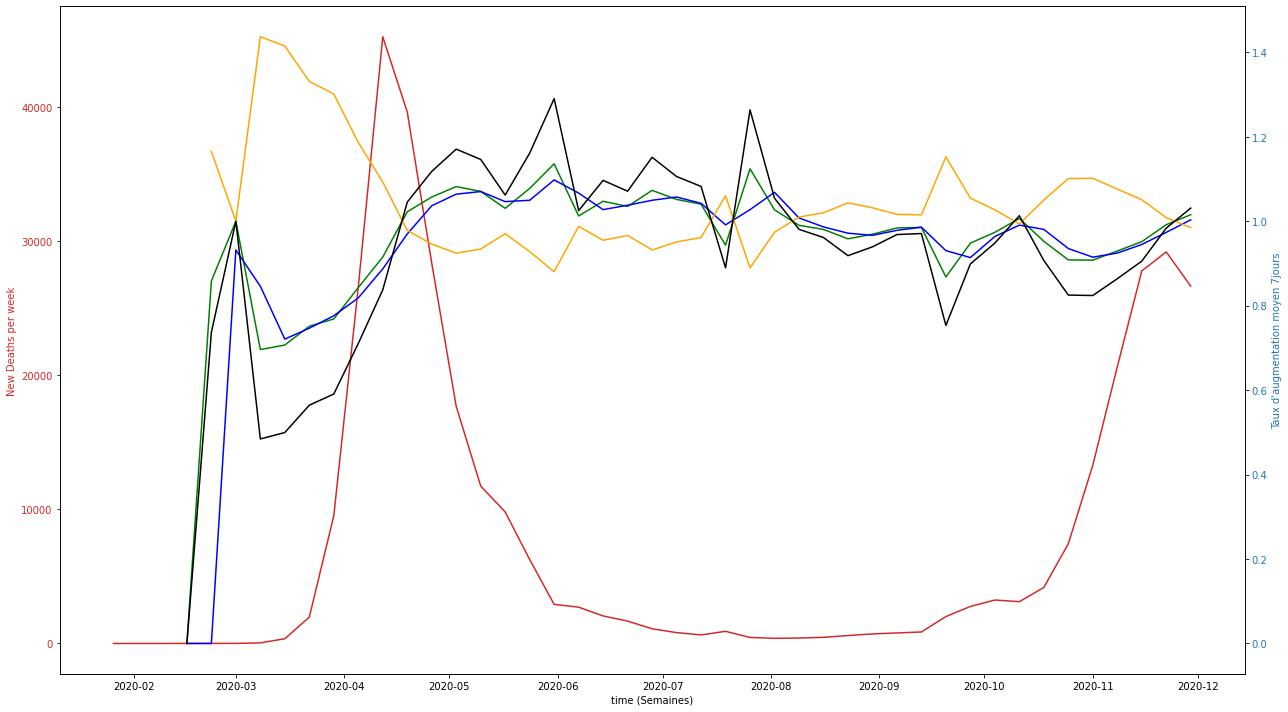

In [388]:
# plt.plot(df_france[['shift']])
# plt.plot(df_france[['d_t-7']])
# plt.plot(df_france[['d_t-14']])


# plt.show()
# plt.plot(df_france[['France']])
# plt.show()

# plt.figure(figsize=(18,10))

fig, ax1 = plt.subplots(figsize=(18,10))

color = 'tab:red'
ax1.set_xlabel('time (Semaines)')
ax1.set_ylabel('New Deaths per week', color=color)
ax1.plot( df_france[['shift']], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel("Taux d'augmentation moyen 7jours", color=color)  # we already handled the x-label with ax1
# for i in range(3,8):
#     ax2.plot( df_france[[f'delta_{i*7}']], color=color)

ax2.plot( df_france[['delta_7']], color='green')

ax2.plot( df_france[['delta_14']], color='blue')
# ax2.plot( df_france[['d_t-14**']], color='green')
#ax2.yscale('log')
ax2.plot( df_france[['d_t-7**']], color='orange')
ax2.plot(df_france[['Arturo']], color='black') ## arturo = delta7



ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

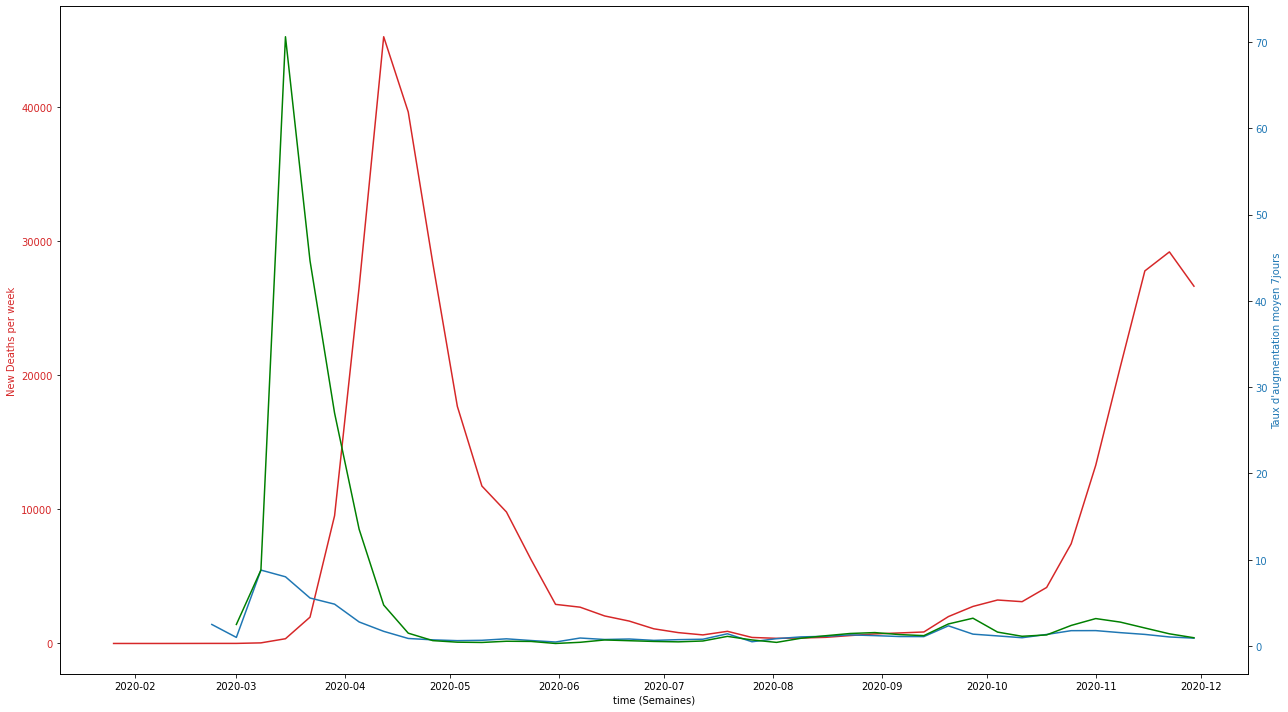

In [308]:

fig, ax1 = plt.subplots(figsize=(18,10))

color = 'tab:red'
ax1.set_xlabel('time (Semaines)')
ax1.set_ylabel('New Deaths per week', color=color)
ax1.plot( df_france[['shift']], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel("Taux d'augmentation moyen 7jours", color=color)  # we already handled the x-label with ax1
ax2.plot( df_france[['d_t-7']], color=color)
ax2.plot( df_france[['d_t-14']], color='green')
#ax2.yscale('log')


ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Exploration de la France sur df_death

In [292]:
df_france = df_death['France']

In [293]:
df_france = pd.DataFrame(df_france)

In [294]:
df_france['shift'] = df_france.diff().fillna(0)

In [295]:
df_france = df_france.iloc[:45,:]

In [296]:
df_france

,France,shift
date,,
2020-01-26,0,0.0
2020-02-02,0,0.0
2020-02-09,0,0.0
2020-02-16,2,2.0
2020-02-23,7,5.0
2020-03-01,12,5.0
2020-03-08,56,44.0
2020-03-15,409,353.0
2020-03-22,2373,1964.0


In [297]:
df_france['delta7'] = df_france['shift'].shift(periods=1, freq=None, axis=0, fill_value=None)

In [298]:
df_france['delta14'] = df_france['shift'].shift(periods=2, freq=None, axis=0, fill_value=None)

In [299]:
df_france.head(10)

,France,shift,delta7,delta14
date,,,,
2020-01-26,0,0.0,NaN,NaN
2020-02-02,0,0.0,0.0,NaN
2020-02-09,0,0.0,0.0,0.0
2020-02-16,2,2.0,0.0,0.0
2020-02-23,7,5.0,2.0,0.0
2020-03-01,12,5.0,5.0,2.0
2020-03-08,56,44.0,5.0,5.0
2020-03-15,409,353.0,44.0,5.0
2020-03-22,2373,1964.0,353.0,44.0


In [300]:
df_france['d_t-7'] = df_france['shift']/df_france['delta7']
df_france['d_t-14'] = df_france['shift']/df_france['delta14']


In [301]:
df_france['d_t-7**'] = (df_france['shift']/df_france['delta7'])**(1/6)


In [302]:
df_france['d_t-14**'] = (df_france['shift']/df_france['delta14'])**(1/13)

In [303]:
df_france.tail(3)

,France,shift,delta7,delta14,d_t-7,d_t-14,d_t-7**,d_t-14**
date,,,,,,,,
2020-11-15,299144,27790.0,20627.0,13293.0,1.347263,2.090574,1.050934,1.058366
2020-11-22,328352,29208.0,27790.0,20627.0,1.051026,1.416008,1.008329,1.027118
2020-11-29,355002,26650.0,29208.0,27790.0,0.912421,0.958978,0.984840,0.996783


In [304]:
df_france.head(10)

,France,shift,delta7,delta14,d_t-7,d_t-14,d_t-7**,d_t-14**
date,,,,,,,,
2020-01-26,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-02,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-09,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-02-16,2,2.0,0.0,0.0,inf,inf,inf,inf
2020-02-23,7,5.0,2.0,0.0,2.500000,inf,1.164993,inf
2020-03-01,12,5.0,5.0,2.0,1.000000,2.500000,1.000000,1.073027
2020-03-08,56,44.0,5.0,5.0,8.800000,8.800000,1.436858,1.182095
2020-03-15,409,353.0,44.0,5.0,8.022727,70.600000,1.414882,1.387445
2020-03-22,2373,1964.0,353.0,44.0,5.563739,44.636364,1.331152,1.339366


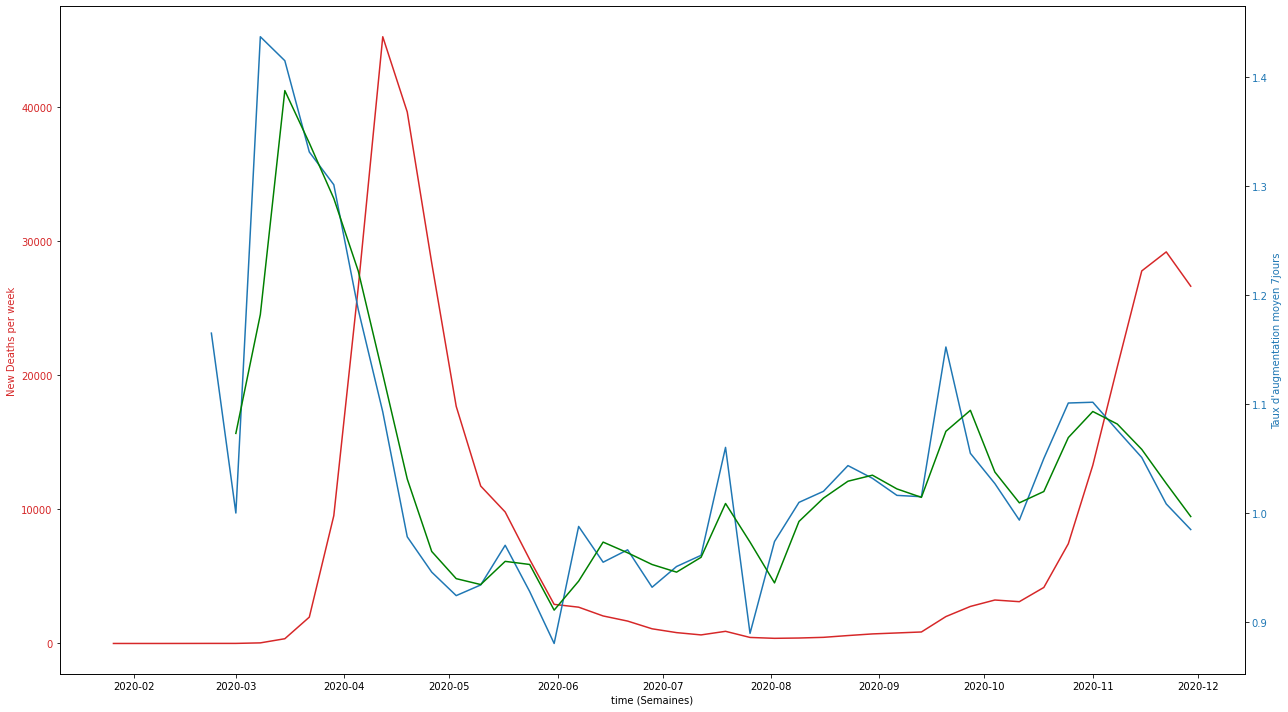

In [310]:
# plt.plot(df_france[['shift']])
# plt.plot(df_france[['d_t-7']])
# plt.plot(df_france[['d_t-14']])


# plt.show()
# plt.plot(df_france[['France']])
# plt.show()

# plt.figure(figsize=(18,10))

fig, ax1 = plt.subplots(figsize=(18,10))

color = 'tab:red'
ax1.set_xlabel('time (Semaines)')
ax1.set_ylabel('New Deaths per week', color=color)
ax1.plot( df_france[['shift']], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel("Taux d'augmentation moyen 7jours", color=color)  # we already handled the x-label with ax1
ax2.plot( df_france[['d_t-7**']], color=color)
ax2.plot( df_france[['d_t-14**']], color='green')
#ax2.yscale('log')

ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

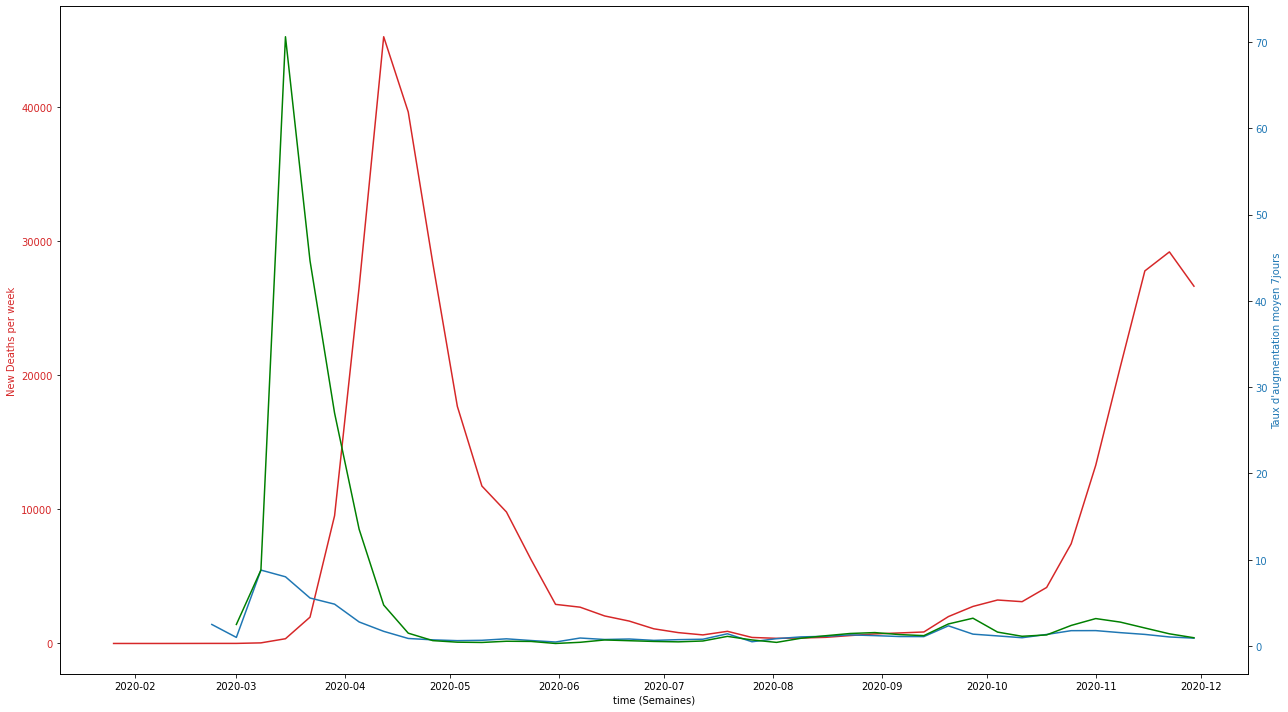

In [308]:

fig, ax1 = plt.subplots(figsize=(18,10))

color = 'tab:red'
ax1.set_xlabel('time (Semaines)')
ax1.set_ylabel('New Deaths per week', color=color)
ax1.plot( df_france[['shift']], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel("Taux d'augmentation moyen 7jours", color=color)  # we already handled the x-label with ax1
ax2.plot( df_france[['d_t-7']], color=color)
ax2.plot( df_france[['d_t-14']], color='green')
#ax2.yscale('log')


ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()